<a href="https://colab.research.google.com/github/franklinperseuDS/trabalhomodulo02/blob/master/Trabalho01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Devem apresentar um resumo (sumário) com as estat´ısticas dos dados originais, ou seja, sem qualquer pr´e-processamento. A apresentação deste tipo de informação é relevante para que outras pessoas possam ter uma visão geral dos dados. As estat´ısticas podem ser apresentadas atrav´es de tabelas e/ou gr´aficos. http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz

###plotar gráficos por
####tw por pais - ok
####tw por lugar (escolhemos o Brasil) - ok
####tw por idioma - ok
####tw por periodo

###Coletando os dados para o trabalho

####instalando pacotes

In [ ]:
!pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp36-none-any.whl size=28555 sha256=dfd7b3d7d615698c4d52eff85fed5dcdc027c2f9440bf96ecfc97aaff1508417
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [ ]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (100 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144619 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing trigge

In [ ]:
!pip install -q pyproj==1.9.6

     |████████████████████████████████| 2.8MB 4.5MB/s 


####fazendo os imports.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
import nltk
from nltk import sent_tokenize
import mplleaflet
import re




In [ ]:
!wget http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz

--2020-09-30 23:10:11--  http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
Resolving tiagodemelo.info (tiagodemelo.info)... 108.167.188.189
Connecting to tiagodemelo.info (tiagodemelo.info)|108.167.188.189|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143340808 (137M) [application/x-gzip]
Saving to: ‘dados-curso-completo.csv.tar.gz’

dados-curso-complet 100%[===================>] 136.70M  42.1MB/s    in 3.2s    

2020-09-30 23:10:15 (42.1 MB/s) - ‘dados-curso-completo.csv.tar.gz’ saved [143340808/143340808]



###Extraindo o arquivo gz
  

In [ ]:
import gzip
import shutil

with gzip.open('dados-curso-completo.csv.tar.gz', 'rb') as entrada:
    with open('dados-curso.csv', 'wb') as saida:
        shutil.copyfileobj(entrada, saida)

###adicionando os arquivos em um dataframe

In [ ]:
dados = pd.read_csv("/content/dados-curso.csv")

In [ ]:
dados = pd.DataFrame(dados)

In [ ]:
type(dados)

pandas.core.frame.DataFrame

###verificando a quantidade de linhas x colunas do Dataset

In [ ]:
dados.shape

(1658826, 13)

###Visualização dos Dados,os 5 primeiros  e os 5 últimos

In [ ]:
dados.head()

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0.0,138.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0.0,56.0,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0.0,5.0,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0.0,1885.0,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0.0,124.0,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


###Quais e quantos Paises existem no Dataset

In [ ]:
dados.pais.describe()

count      74600
unique       121
top       Brazil
freq       67247
Name: pais, dtype: object

In [ ]:
paises = dados.pais.unique()
print(paises)
print("Existem Cerca de ",len(paises)," paises")

[nan 'Brazil' 'Ireland' 'Portugal' 'Spain' 'Germany' 'Canada'
 'United States' 'Angola' 'Uganda' 'The Netherlands' 'Japan'
 'United Kingdom' 'Republic of Mozambique' 'Belgium'
 'Kingdom of Saudi Arabia' 'Venezuela' 'Pakistan' 'Indonesia' 'Chile'
 'Senegal' 'Argentina' 'Colombia' 'France' 'Turkey' 'Austria' 'Paraguay'
 'Italy' 'New Zealand' 'Kenya' "People's Republic of China" 'Panama'
 'Ghana' 'Ecuador' 'Haiti' 'Australia' 'Mexico'
 'Republic of the Philippines' 'Republic of Croatia' 'South Africa'
 'Denmark' 'India' 'Costa Rica' 'Nigeria' 'Malaysia' 'North Korea'
 'Uruguay' 'Cyprus' 'Egypt' 'Dominican Republic' 'Vietnam' 'Bahrain'
 'El Salvador' 'Switzerland' 'United Arab Emirates' 'Sri Lanka'
 'Cape Verde' 'Slovak Republic' 'Sweden' 'Israel' 'Honduras' 'Montenegro'
 'Thailand' 'Peru' 'Czech Republic' 'Luxembourg' 'Oman' 'Taiwan' 'Georgia'
 'Islamic Republic of Iran' 'Ivory Coast' 'Botswana' 'Ukraine' 'Lebanon'
 'Romania' 'Kazakhstan' 'East Timor' 'Bolivia' 'Macau' 'Norway' 'Cameroon'

In [ ]:
dados.pais.value_counts()

Brazil                              67247
Portugal                             2675
United States                        1068
Italy                                 484
Spain                                 379
                                    ...  
Botswana                                1
Suriname                                1
Islamic Republic of Iran                1
Montenegro                              1
Lao People's Democratic Republic        1
Name: pais, Length: 121, dtype: int64

###Quantos e quais idiomas existem no Dataset

In [ ]:
dados.idioma.describe()

count     1658825
unique         59
top            pt
freq      1586796
Name: idioma, dtype: object

In [ ]:
idiomas = dados.idioma.unique()
print(idiomas)
print("Existem ", len(idiomas), "idiomas no DataSET")

['pt' 'en' 'es' 'ar' 'tl' 'fr' 'und' 'nl' 'ja' 'cy' 'th' 'fa' 'it' 'de'
 'tr' 'eu' 'ca' 'ko' 'in' 'ht' 'lt' 'zh' 'hi' 'lv' 'sv' 'is' 'pl' 'ur'
 'sd' 'vi' 'no' 'te' 'cs' 'ta' 'da' 'ru' 'hu' 'ro' 'et' 'uk' 'el' 'sr'
 'fi' 'bn' 'iw' 'sl' 'bg' 'ne' 'am' 'ps' 'ml' 'gu' 'mr' 'or' 'ckb' 'si'
 'dv' 'my' 'kn' nan]
Existem  60 idiomas no DataSET


In [ ]:
dados.idioma.value_counts()

pt     1586796
en       23991
es       14255
it        6480
und       5656
ar        4579
fr        3656
ca        2600
tr        2296
ja        1955
in         948
th         890
tl         604
ko         544
hi         485
ru         417
de         361
pl         262
fa         258
nl         208
ur         179
ht         167
et         162
eu         116
el          94
lt          86
sv          84
cs          72
no          56
zh          51
da          45
ro          45
fi          44
cy          39
uk          37
iw          36
lv          36
ta          32
hu          26
vi          23
is          21
sr          20
sl          18
te          17
sd          12
ne          11
mr          10
bn          10
gu           7
ps           6
ckb          5
bg           4
am           4
si           2
ml           2
or           2
kn           1
dv           1
my           1
Name: idioma, dtype: int64

###Quais e quantas cidades existem no dataset

In [ ]:
cidades = dados.lugar.unique()
print(cidades)

print("Existem ",len(cidades), "no Dataset")

[nan 'Brasília' 'Macaé' ... 'Laranjeiras' 'BAIRRO DA CABANAGEM'
 'São José do Piauí']
Existem  4501 no Dataset


In [ ]:
dados.lugar.value_counts()


Rio de Janeiro                                       8443
Sao Paulo                                            7469
Brasília                                             2822
Porto Alegre                                         1866
Belo Horizonte                                       1764
                                                     ... 
TVM                                                     1
Carmel                                                  1
Biblioteca Pública do Estado do Rio Grande do Sul       1
Santo Antônio do Aventureiro                            1
South Riding                                            1
Name: lugar, Length: 4500, dtype: int64

In [ ]:
dados.lugar.describe()

count              74605
unique              4500
top       Rio de Janeiro
freq                8443
Name: lugar, dtype: object

### saber quantas vezes foi retweetado

In [ ]:
sum(dados.retweet.value_counts())



1658825

In [ ]:
dados.seguidores.values

array([ 138.,   56.,    5., ..., 1000.,  726.,   nan])

In [ ]:
dados.seguidores.describe()

count    1.658825e+06
mean     3.257206e+04
std      3.680300e+05
min      0.000000e+00
25%      1.010000e+02
50%      3.800000e+02
75%      1.470000e+03
max      8.424125e+07
Name: seguidores, dtype: float64

##Verificar engajamento Geral (via Retweets)

In [ ]:
dados[dados['retweet']==dados['retweet'].max()]

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
728919,2020-05-21 22:45:41,Maryy,marisolcurcio13,RT @BTS_twt: Never Not 💜 https://t.co/Ag9oUTJvrN,1139763.0,8.0,en,NaN,NaN,NaN,NaN,NaN,[]


In [ ]:
df = dados[dados['retweet']> dados['retweet'].mean()]

In [ ]:
df['pais'].value_counts()

Brazil                        140
United States                   5
France                          2
Portugal                        2
Chile                           1
United Kingdom                  1
Argentina                       1
People's Republic of China      1
Name: pais, dtype: int64

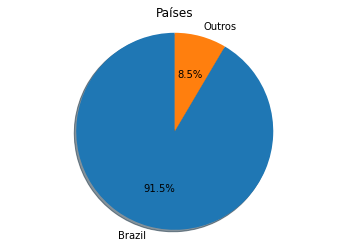

In [ ]:
tw_pais= df['pais'].value_counts().to_dict()

name = list(tw_pais.keys())
ky = list(tw_pais.keys())
vl = list(tw_pais.values())
v_bras = vl[0]
v_outros = sum(vl) - vl[0]

Grafico_pizza = {"Brazil" : v_bras, "Outros":v_outros}

nomes_gp = list(Grafico_pizza.keys())
valores_gp = list(Grafico_pizza.values())

fig1, ax1 = plt.subplots()
ax1.pie(valores_gp, labels=nomes_gp, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Países")
plt.show()

## Ver engajamento no Brasil

In [ ]:
df = df[df['pais'] == 'Brazil']

In [ ]:
df['lugar'].value_counts()

Sao Paulo                   30
Brasília                    29
Rio de Janeiro              23
Porto Alegre                18
Recife                       4
Canoas                       3
Santarém                     3
Goiânia                      3
Belém                        3
Manaus                       3
Brazil                       2
Uberlândia                   2
Caratinga                    2
Analândia                    1
Sinop                        1
Rochedo de Minas             1
Floriano                     1
Campinas                     1
Palácio Itamaraty            1
Fortaleza                    1
Salvador                     1
Complexo da Penha            1
Campo Grande                 1
Conceição do Mato Dentro     1
Congresso Nacional           1
São Gonçalo                  1
Mata de São João             1
São Luís                     1
Name: lugar, dtype: int64

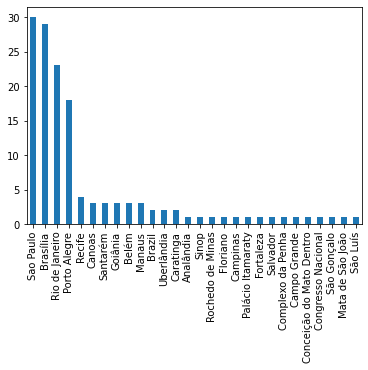

In [ ]:
df['lugar'].value_counts().plot(kind='bar')
plt.show()

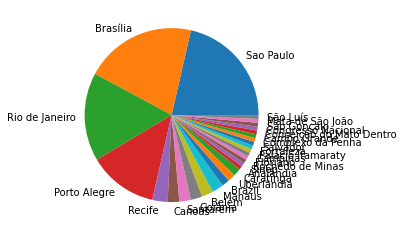

In [ ]:
rt=df['lugar'].value_counts().to_dict()

ky = list(rt.keys())
vl = list(rt.values())
plt.pie(vl, labels=ky)
plt.show()

###Verificar quantas pessoas tweetaram em português

In [ ]:
dados.loc[dados.idioma == 'pt']

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0.0,138.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0.0,56.0,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0.0,5.0,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0.0,1885.0,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0.0,124.0,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658820,2020-03-13 17:26:18,broca,whoisdrill,oms: tamo tendo pandemia evitar\n conglomerado...,0.0,361.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1658821,2020-05-12 13:02:34,Renato 🇧🇷,VerdadeExpress,"@OsmarTerra Sr. Osmar Terra, gostaria de ouvir...",0.0,4066.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1658822,2020-03-19 18:16:30,eugeniocosta8,EugenioCosta8,CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...,3.0,5307.0,pt,NaN,NaN,NaN,NaN,NaN,['CORONAVIRUS']
1658823,2020-04-07 18:14:45,Wagner Mota - Seriedade + Geek,wagnermota75,"#BolsonaroTemRazaoSim porque, quando a prefeit...",0.0,1000.0,pt,NaN,NaN,NaN,NaN,NaN,['BolsonaroTemRazaoSim']


In [ ]:
dados

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0.0,138.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0.0,56.0,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0.0,5.0,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0.0,1885.0,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0.0,124.0,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658821,2020-05-12 13:02:34,Renato 🇧🇷,VerdadeExpress,"@OsmarTerra Sr. Osmar Terra, gostaria de ouvir...",0.0,4066.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1658822,2020-03-19 18:16:30,eugeniocosta8,EugenioCosta8,CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...,3.0,5307.0,pt,NaN,NaN,NaN,NaN,NaN,['CORONAVIRUS']
1658823,2020-04-07 18:14:45,Wagner Mota - Seriedade + Geek,wagnermota75,"#BolsonaroTemRazaoSim porque, quando a prefeit...",0.0,1000.0,pt,NaN,NaN,NaN,NaN,NaN,['BolsonaroTemRazaoSim']
1658824,2020-06-02 16:04:51,Fotógrafo,omarcelogoulart,"Em meio a uma pandemia, estamos na luta também...",0.0,726.0,pt,São Félix do Araguaia,Brazil,BR,-53.0000,-11.00000,[]


Verificar a localização utilizando as coordenadas de Latitude /  Longitude

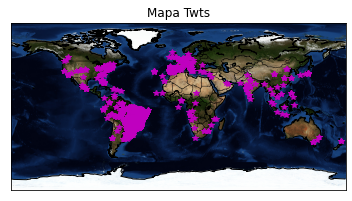

In [ ]:
# esse ta rodando correto m = Basemap(projection= 'mill',llcrnrlat = -90, llcrnrlon = -180, urcrnrlat = 90, urcrnrlon= 180, resolution='h' )
# esse não consegui fazer funcionarm = Basemap(width=12000000,height=9000000,projection='lcc',resolution=None,lat_0=0,lon_0=0)
#projection = 'mill' originalmente
#resolution = 'c','l','i','h' or 'f'
m = Basemap()
m.drawcoastlines()
m.drawcountries()
#m.drawstates() 
m.bluemarble() #adiciona os oceanos


m.plot(dados['latitude'],dados['longitude'], 'm*')



plt.title("Mapa Twts")
plt.show()


In [ ]:
"""df = dados[(dados['latitude'].notnull()) & (dados['longitude'].notnull())]
plt.scatter(df['longitude'],df['latitude'], marker='.')
mplleaflet.display()"""

"df = dados[(dados['latitude'].notnull()) & (dados['longitude'].notnull())]\nplt.scatter(df['longitude'],df['latitude'], marker='.')\nmplleaflet.display()"

####gráfico para ver os paises.


In [ ]:
paises = dados.pais.unique()
df = dados.loc[dados['pais'] == 'Brazil']
tweets_pais = dados.pais.value_counts()

In [ ]:
tweets_pais = tweets_pais.dropna()

In [ ]:
tweets_dicts = tweets_pais.to_dict()

In [ ]:
print(tweets_dicts)

{'Brazil': 67247, 'Portugal': 2675, 'United States': 1068, 'Italy': 484, 'Spain': 379, 'United Kingdom': 323, 'France': 218, 'Argentina': 193, 'Republic of Mozambique': 167, 'Canada': 152, 'Ireland': 150, 'Germany': 133, 'Japan': 91, 'Angola': 84, 'India': 79, 'Mexico': 76, 'Chile': 73, 'Paraguay': 55, 'Australia': 50, 'Colombia': 48, "People's Republic of China": 47, 'Belgium': 43, 'The Netherlands': 41, 'Turkey': 40, 'Switzerland': 37, 'South Africa': 36, 'Ecuador': 32, 'Kingdom of Saudi Arabia': 31, 'Uruguay': 31, 'Nigeria': 30, 'New Zealand': 28, 'Venezuela': 28, 'Austria': 27, 'Indonesia': 20, 'Slovak Republic': 20, 'Republic of the Philippines': 18, 'Peru': 18, 'Sweden': 16, 'Denmark': 13, 'Ghana': 12, 'El Salvador': 11, 'Panama': 11, 'Dominican Republic': 11, 'Pakistan': 11, 'United Arab Emirates': 11, 'Bolivia': 11, 'Egypt': 10, 'Cape Verde': 9, 'Malaysia': 9, 'Kenya': 8, 'Kuwait': 7, 'Uganda': 7, 'Czech Republic': 7, 'Israel': 6, 'Thailand': 6, 'Bahrain': 6, 'Namibia': 5, 'Rom

In [ ]:
names = list(tweets_dicts.keys())

In [ ]:
values = list(tweets_dicts.values())

In [ ]:
values_brasil = values[0]
print(values_brasil)

67247


In [ ]:
for i in range(len(values)):
      values_outros = sum(values)
values_outros = values_outros - values[0]
print(values_outros)

Grafico_pizza = {"Brazil" : values_brasil, "Outros":values_outros}
 

7353


In [ ]:
print(Grafico_pizza)
nomes_gp = list(Grafico_pizza.keys())
valores_gp = list(Grafico_pizza.values())

{'Brazil': 67247, 'Outros': 7353}


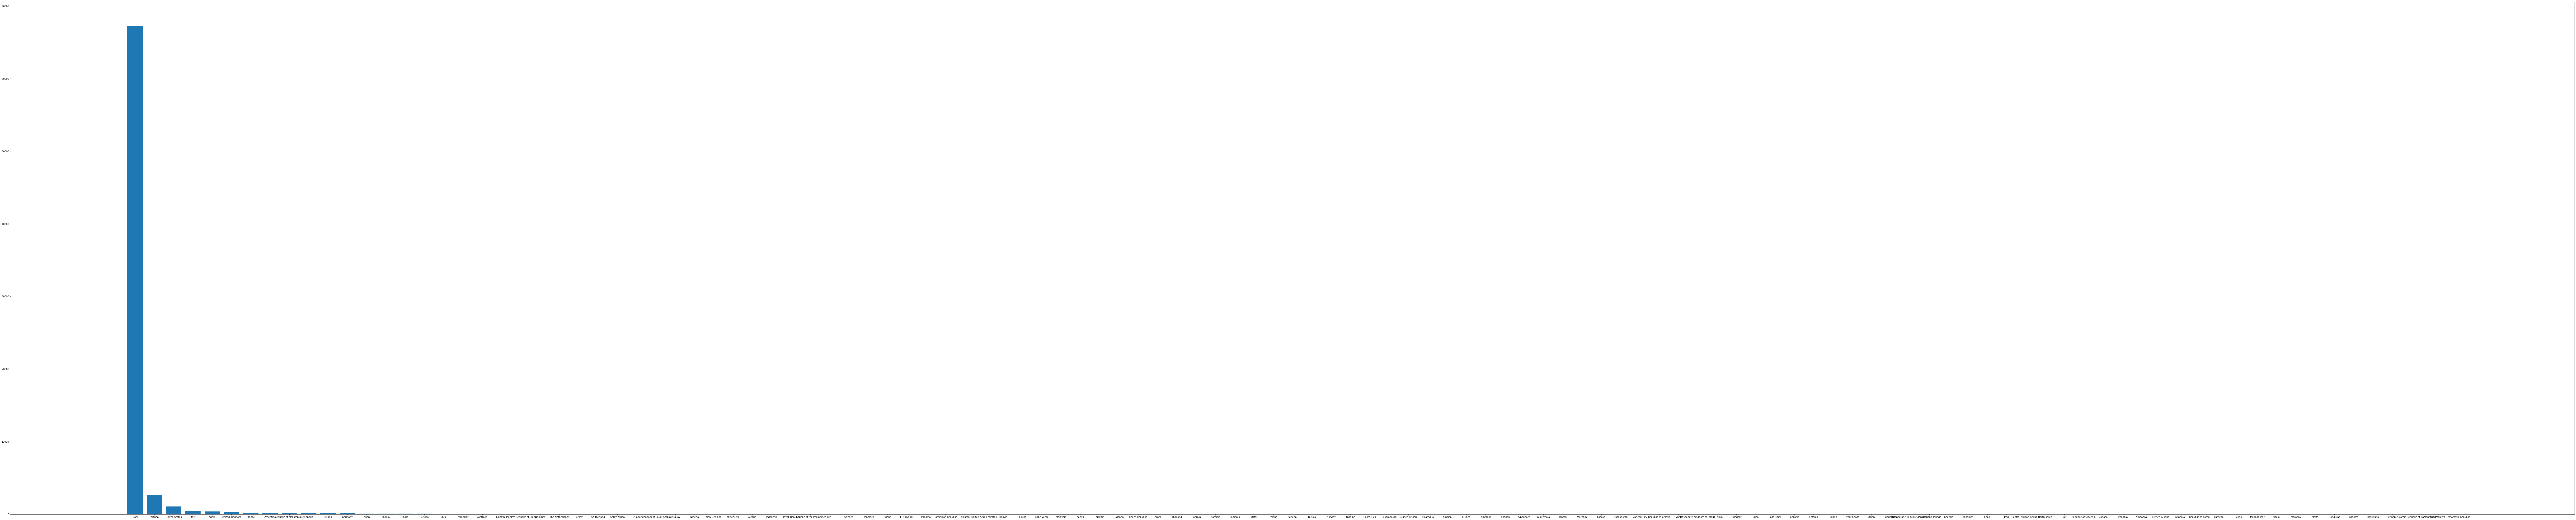

In [ ]:
fig = plt.figure(figsize=(150,30))
ax = fig.add_axes([0,0,1,1])
ax.bar(names,values)
plt.show()

####Fazendo o gráfico em pizza

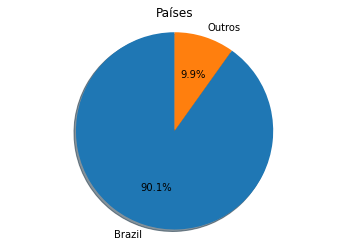

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
#sizes = [15, 30, 45, 10]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(valores_gp, labels=nomes_gp, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Países")
plt.show()

In [ ]:
"""

teste.plot()
plt.title('Graf teste') #adicionando o título
plt.xlabel('funciona')
plt.ylabel('sim')
plt.show()
"""

"\n\nteste.plot()\nplt.title('Graf teste') #adicionando o título\nplt.xlabel('funciona')\nplt.ylabel('sim')\nplt.show()\n"

In [ ]:
"""cidadesUniq = dados.lugar.value_counts
cidadesUniq = pd.DataFrame(cidadesUniq)"""

'cidadesUniq = dados.lugar.value_counts\ncidadesUniq = pd.DataFrame(cidadesUniq)'

In [ ]:
"""type(cidadesUniq)"""

'type(cidadesUniq)'

####Gráfico para ver as cidades do Brasil

####Gráfico para ver os idiomas


In [ ]:
idioma = dados.idioma.value_counts()

In [ ]:
idioma = idioma.to_dict()

In [ ]:
idioma

{'am': 4,
 'ar': 4579,
 'bg': 4,
 'bn': 10,
 'ca': 2600,
 'ckb': 5,
 'cs': 72,
 'cy': 39,
 'da': 45,
 'de': 361,
 'dv': 1,
 'el': 94,
 'en': 23991,
 'es': 14255,
 'et': 162,
 'eu': 116,
 'fa': 258,
 'fi': 44,
 'fr': 3656,
 'gu': 7,
 'hi': 485,
 'ht': 167,
 'hu': 26,
 'in': 948,
 'is': 21,
 'it': 6480,
 'iw': 36,
 'ja': 1955,
 'kn': 1,
 'ko': 544,
 'lt': 86,
 'lv': 36,
 'ml': 2,
 'mr': 10,
 'my': 1,
 'ne': 11,
 'nl': 208,
 'no': 56,
 'or': 2,
 'pl': 262,
 'ps': 6,
 'pt': 1586796,
 'ro': 45,
 'ru': 417,
 'sd': 12,
 'si': 2,
 'sl': 18,
 'sr': 20,
 'sv': 84,
 'ta': 32,
 'te': 17,
 'th': 890,
 'tl': 604,
 'tr': 2296,
 'uk': 37,
 'und': 5656,
 'ur': 179,
 'vi': 23,
 'zh': 51}

In [ ]:
idiomaChave = idioma.keys()
idiomaValues = idioma.values()

In [ ]:
#Gráfico em Barras para os idiomas
fig = plt.figure(figsize=(150,150))
ax = fig.add_axes([0,0,1,1])
ax.bar(idiomaChave,idiomaValues)
plt.show()

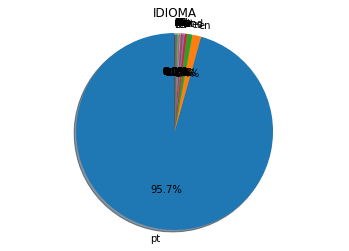

In [ ]:
#Gráfico em Pizza para os idiomas
fig1, ax1 = plt.subplots()
ax1.pie(idiomaValues, labels=idiomaChave, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("IDIOMA")
plt.show()

###Coisas Extas

####Criando uma copia do dataframe 


In [ ]:
dados2 = dados.copy()

####Verificando se tem dados duplicados e limpando os duplicados



In [ ]:
#verificando
dados2.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1658821    False
1658822    False
1658823    False
1658824    False
1658825    False
Length: 1658826, dtype: bool

In [ ]:
#Limpando
dados2 = dados2.drop_duplicates()

In [ ]:
#pouca diferença entre linhas duplicadas
dados2.shape

(1658824, 13)

####limpando se tem dados em branco (NaN)

In [ ]:
dados2.dropna()

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0.0,124.0,pt,Brasília,Brazil,BR,-47.877800,-15.776910,[]
261,2020-04-16 00:34:54,Felipe Silva,felipesilvasr,A secretaria de Saúde da Paraíba confirmou nes...,0.0,150.0,pt,Taperoá,Brazil,BR,-36.825000,-7.162778,[]
265,2020-05-03 13:48:52,Bruno Fortes,Brunaogf,Domingão taí! ☀️\nEm casa! 😐😬\nVai passar! 🙏🏼\...,0.0,120.0,pt,Fortaleza,Brazil,BR,-38.526600,-3.729300,"['emcasa', 'isolamentosocial', 'saude', 'quero..."
289,2020-03-31 17:52:37,jairo santos souza,soi_jairo,"Seguindo orientação do Presidente Bolsonaro, o...",0.0,22.0,pt,Euclides da Cunha,Brazil,BR,-39.014620,-10.505250,[]
477,2020-03-24 17:27:29,Carolina Porne,carolinaporne,#5 - Isolamento social não é desculpa para fic...,0.0,373.0,pt,Guarulhos,Brazil,BR,-46.495600,-23.445600,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658284,2020-04-16 19:45:29,Bruno Agrofoglio Ferreira,agrofoglio,Criei um bot para o Telegram raspando os dados...,0.0,49.0,pt,Paulínia,Brazil,BR,-47.203010,-22.757163,[]
1658503,2020-05-31 12:38:32,BARÃO DE CEARA MIRIM,baraocearamirim,Serra da Formiga em Riachuelo RN\nDestino marc...,0.0,808.0,pt,Riachuelo,Brazil,BR,-35.823770,-5.815792,[]
1658514,2020-03-23 23:48:19,Diego Pelizari,diegopelizari,#Repost de respeito da parceira agroschoolbras...,0.0,174.0,pt,São Félix do Araguaia,Brazil,BR,-53.000000,-11.000000,['Repost']
1658760,2020-05-12 09:30:34,Hamilton Valerio,hvalerio,Mais um amanhecer em isolamento social. em Pra...,0.0,176.0,pt,Jaboatão dos Guararapes,Brazil,BR,-34.919555,-8.198139,[]


In [ ]:
dados2.shape

(1658824, 13)

##2. As mensagens foram pré-processadas para que as perguntas (questões) fossem identificadas.Essa coleção de perguntas corresponde ao dataset "DuvidasDB". A seguir, a equipe deve apresentar as estat´ısticas sobre esses dados.

dados.texto.str.contains('?')

In [ ]:
dados.head()

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0.0,138.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0.0,56.0,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0.0,5.0,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0.0,1885.0,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0.0,124.0,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


In [ ]:
dados['texto'][0]

'@BolsonaroSP Cade o fundão deputado??? Congresso está sentado em 3BI olhando a pandemia da janela.'

In [ ]:
dados.iloc[0]

dados-curso-completo.csv                                  2020-03-23 18:51:14
usuario                                                              Gaboardi
apelido                                                               fraslee
texto                       @BolsonaroSP Cade o fundão deputado??? Congres...
retweet                                                                     0
seguidores                                                                138
idioma                                                                     pt
lugar                                                                     NaN
pais                                                                      NaN
sigla                                                                     NaN
latitude                                                                  NaN
longitude                                                                 NaN
hashtags                                                        

#### Criando o DuvidasDB .


In [ ]:

 nltk.download('punkt')

 df = dados.loc[dados['texto'].str.contains('?', regex=False) == True]
 df

IndentationError: ignored

In [ ]:
q=  sent_tokenize(df['texto'][0])
q


In [ ]:
"""for i in range(len(df)):
  if i < 10:
    print(i)
"""
list(df)

In [ ]:
#dadosDB = sent_tokenize(dados.texto('?'))

In [ ]:
#Tentando splitar o texto 
"""dadosDB = pd.DataFrame(columns=['usuario', 'texto'])

for idx, usuario, texto in df.itertuples():
    texto_perguntas = (i.lower() for i in texto.split('?'))

    dadosDB = dadosDB.append(
        [{'usuario': usuario, 'texto': texto} for nw in texto_perguntas],
        ignore_index=True
    )"""

In [ ]:
texto = df.texto

In [ ]:
texto = texto.dropna()

In [ ]:
texto = list(texto)

In [ ]:
texto = tuple(texto)

In [ ]:
setencatpl = ()

In [ ]:
for i in range(len(texto)):
  perg = sent_tokenize(texto[i])
  sentenca.append(perg) 
#re.compile('[.!?]')

In [ ]:
tuple(sentenca)

####duvidasDB

In [ ]:
df = dados.loc[dados['texto'].str.contains('?', regex=False) == True]
df.head()

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0.0,138.0,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0.0,1885.0,pt,NaN,NaN,NaN,NaN,NaN,[]
38,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesMD @dr_pampers Será que corremos o ris...,0.0,86.0,pt,NaN,NaN,NaN,NaN,NaN,[]
45,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,Prioridade ?!\n\n #COVID19 #floripa #isolament...,0.0,219.0,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']"
57,2020-03-30 00:43:36,Valnei do Val,vdoval,"Que tal uma notícia boa, indo na contramão do ...",0.0,201.0,pt,NaN,NaN,NaN,NaN,NaN,[]


limpando nan

In [ ]:
df.dropna()

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
3036,2020-05-23 19:17:26,Fabricio Lopes,33Fabricio,#Repost @33Fabricio with @get_repost\n・・・\nCom...,0.0,105.0,pt,Sorocaba,Brazil,BR,-47.491818,-23.511207,['Repost']
4265,2020-04-13 19:42:10,tembase,tembase,Precisa de um delivery com segurança e rapidez...,0.0,1294.0,pt,Arcos,Brazil,BR,-45.544370,-20.286630,[]
4568,2020-04-06 18:07:36,CãoPanheiro,caopanheirorj,Seu pet precisa de um lugar pra brincar e se d...,0.0,2.0,pt,Rio de Janeiro,Brazil,BR,-43.374200,-22.864700,[]
5441,2020-05-29 15:54:59,youtube: /jujubasena,JulianaSena,✨Você acha que sua maneira de se vestir irá mu...,0.0,566.0,pt,Sao Paulo,Brazil,BR,-46.711885,-23.475639,['quarentena']
20331,2020-05-24 20:02:36,salgattore,salgattore1,Quem disse que não tem festa por conta do coro...,0.0,2.0,pt,João Pessoa,Brazil,BR,-34.838700,-7.098300,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645365,2020-05-31 00:05:50,Revolution Tabacaria & HeadShop,RevTabacaria,"V o c ê S a b i a !?\nA COVID-19, doença ca...",0.0,39.0,pt,Manaus,Brazil,BR,-60.025300,-3.113330,[]
1646014,2020-06-26 03:08:18,Ridelc Ahcor Arierep,CledirRocha,Onde vamos parar?\n#Pandemia #Coronavírus #Cov...,0.0,121.0,pt,João Pessoa,Brazil,BR,-34.862700,-7.120700,"['Pandemia', 'Coronavírus', 'Covid19', 'Covid'..."
1653358,2020-03-21 18:22:55,Edu Gonçalves,iamedugoncalves,"Olá minhas fechações, como estão indo nesse pe...",0.0,221.0,pt,Recife,Brazil,BR,-34.925700,-8.060500,[]
1653613,2020-06-23 03:22:19,Ridelc Ahcor Arierep,CledirRocha,Onde estamos? Para onde vamos?\n#Pandemia #Cor...,0.0,121.0,pt,João Pessoa,Brazil,BR,-34.862700,-7.120700,"['Pandemia', 'Coronavírus', 'Covid19', 'Covid'..."


Organizar Index

In [ ]:
x = []
for i in range(len(df)):
  x.append(i)

In [ ]:
df.index = pd.Index(x)
df.head(10)

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0.0,138.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0.0,1885.0,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesMD @dr_pampers Será que corremos o ris...,0.0,86.0,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,Prioridade ?!\n\n #COVID19 #floripa #isolament...,0.0,219.0,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']"
4,2020-03-30 00:43:36,Valnei do Val,vdoval,"Que tal uma notícia boa, indo na contramão do ...",0.0,201.0,pt,NaN,NaN,NaN,NaN,NaN,[]
5,2020-04-07 23:19:44,Mauricio Ligabo,LigaboMauricio,@JoseMedeirosMT Seria isso algum tipo aleatóri...,0.0,23.0,pt,NaN,NaN,NaN,NaN,NaN,[]
6,2020-04-13 19:16:51,Gus,arrombagus,"""Nova York é o novo epicentro da pandemia de c...",3.0,253.0,pt,Santos,Brazil,BR,NaN,NaN,[]
7,2020-05-15 18:15:33,Silveacyr Maria Coelho Santos,silveacyr,@mitags Será por que o Bolsonaro não fez propa...,0.0,67.0,pt,NaN,NaN,NaN,NaN,NaN,[]
8,2020-04-08 22:04:51,lulleitao,lulleitao,@JeanSCorrea7 Mas ele não deu a entender que o...,0.0,2315.0,pt,NaN,NaN,NaN,NaN,NaN,[]
9,2020-04-02 13:04:55,Luizcarlosdospatetas@hotmail.com,Luizcarlosdosp5,#perguntacorona \nQuero saber se a covid tem c...,0.0,0.0,pt,NaN,NaN,NaN,NaN,NaN,['perguntacorona']


Criar o duvidasDB a partir do df

In [ ]:
duvidasDB = pd.DataFrame(columns=['duvida','id_df'])

funçao de inserir uma linha no novo dataframe (link: https://pt.stackoverflow.com/questions/319032/como-inserir-uma-linha-em-um-dataframe-pandas-no-meio-de-outras-linhas)

In [ ]:
def inserir_linha(idx, dfx, df_inserir):
    dfA = dfx.iloc[:idx, ]
    dfB = dfx.iloc[idx:, ]

    dfx = dfA.append(df_inserir).append(dfB).reset_index(drop = True)

    return dfx

Inserir no duvidasDB

In [ ]:
cont = 0


In [ ]:
for i in range(len(df["texto"])):
  aux = []
  vet=[]
  t = df['texto'][i]
  x=re.split(r'[#.\n]\s*', t)
  for j in range(len(x)):
    cop = x[j]
    y= cop.find("?")
    if(y != -1):
      cop = cop[0:y+1]
      aux.append(cop)
       
  for w in range(len(aux)): 
    d_iserido = d = {'duvida': [aux[w]], 'id_df': [i]}
    df_iserido = pd.DataFrame(data = d_iserido)
    duvidasDB = inserir_linha(cont, duvidasDB, df_iserido) 
    cont+=1 

KeyboardInterrupt: ignored

In [ ]:
duvidasDB.head(1000)

,duvida,id_df
0,@BolsonaroSP Cade o fundão deputado?,0
1,Fumaça de cigarro pode propagar coronavírus?,1
2,@ipratesMD @dr_pampers Será que corremos o ris...,2
3,Prioridade ?,3
4,"Que tal uma notícia boa, indo na contramão do ...",4
...,...,...
995,e minha tia q vai fazer festa de aniversário p...,965
996,@cafecomferri Alguém conseguiu encontrar este ...,966
997,cadê os balões?,967
998,"@kurobaketsu2 @GeracaodeValor @jubartty Ok, as...",968
